In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [4]:
df = df[df.Gender == 'M']
height = df[['Father', 'Height']].rename(columns={'Height': 'Son'})
height.Father = height.Father * 2.54
height.Son = height.Son * 2.54
height.describe()

,Father,Son
count,465.000000,465.000000
mean,175.687157,175.841196
std,5.841820,6.684249
min,157.480000,152.400000
25%,172.720000,171.450000
50%,175.260000,175.768000
75%,179.070000,180.340000
max,199.390000,200.660000


In [5]:
import numpy as np
A = np.vstack([height.Father, np.ones(len(height.Father))]).T
A.shape

(465, 2)

In [6]:
reg = np.linalg.lstsq(A, height.Son, rcond=None)
reg

(array([ 0.44774792, 97.17763701]),
 array([17556.59951549]),
 2,
 array([3.79064358e+03, 7.15847817e-01]))

In [7]:
m, c, rss = *reg[0], reg[1][0]
print(f'기울기: {m:.4f}, 절편: {c:.4f}, 잔차제곱: {rss:.2f}')

기울기: 0.4477, 절편: 97.1776, 잔차제곱: 17556.60


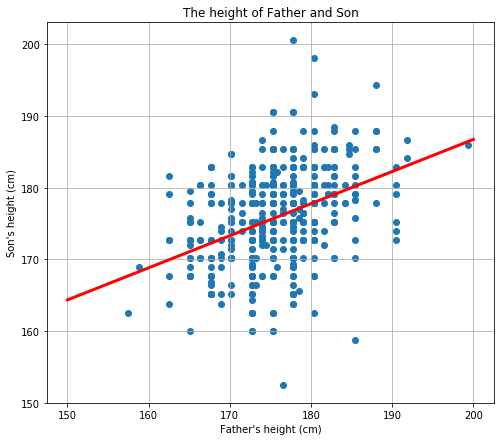

In [8]:
plt.figure(figsize=(8,7))
plt.scatter(height.Father, height.Son)
plt.plot([150, 200], [m*150+c, m*200+c], 'r', lw=3)
plt.title('The height of Father and Son')
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.grid()
plt.show()

In [9]:
X = height.Father.values.reshape(-1,1)
y = height.Son.values

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
weight, bias, rss = lr.coef_, lr.intercept_, lr._residues
print(f'기울기: {weight[0]:.4f}, 절편: {bias:.4f}, 잔차제곱: {rss:.2f}')

기울기: 0.4477, 절편: 97.1776, 잔차제곱: 17556.60


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

pred = lr.predict(X)
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)
print(f'Mean Squared Error: {mse:.4f}, R2 Score: {r2:.4f}')

Mean Squared Error: 37.7561, R2 Score: 0.1531


In [23]:
score = lr.score(X, y)
print(f'R_squared score: {score:.4f}')

R_squared score: 0.1531


In [18]:
mse**2

1425.525200820644

In [19]:
lr._residues

17556.59951549399

In [21]:
weight, bias

(array([0.44774792]), 97.17763700739346)